In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
minst_data_set= tf.keras.datasets.mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = minst_data_set.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_labels.shape

(60000,)

In [8]:
train_images.shape

(60000, 28, 28)

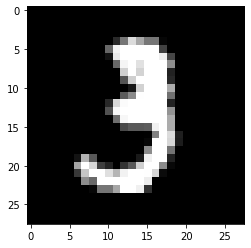

In [18]:
plt.imshow(train_images[10],cmap='gray')

In [13]:
train_images[0].max()

255

In [14]:
train_images[0].min()

0

In [19]:
train_labels[10]

3

In [27]:
model=tf.keras.Sequential()

In [28]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [29]:
model.add(tf.keras.layers.Dense(units=128,activation='relu')) # why units = 128 ???

In [30]:
model.add(tf.keras.layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')

In [33]:
history= model.fit(train_images,train_labels,batch_size=64,epochs=10,validation_split=.2) 

Epoch 1/10
750/750 [==============================] - 5s 3ms/step - loss: 3.7734 - accuracy: 0.8625 - val_loss: 0.7982 - val_accuracy: 0.8812
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5282 - accuracy: 0.9020 - val_loss: 0.4344 - val_accuracy: 0.9182
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3093 - accuracy: 0.9284 - val_loss: 0.3835 - val_accuracy: 0.9277
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2466 - accuracy: 0.9395 - val_loss: 0.3218 - val_accuracy: 0.9369
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2064 - accuracy: 0.9477 - val_loss: 0.3603 - val_accuracy: 0.9356
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1887 - accuracy: 0.9510 - val_loss: 0.2712 - val_accuracy: 0.9465
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1781 - accuracy: 0.9545 - val_loss: 0.2867 - val_accuracy: 0.9414
Epoch 

In [34]:
history.history

{'loss': [3.773427963256836,
  0.528195858001709,
  0.30925875902175903,
  0.24656979739665985,
  0.2063746303319931,
  0.1886778622865677,
  0.1780502051115036,
  0.17607009410858154,
  0.16287453472614288,
  0.14255894720554352],
 'accuracy': [0.862500011920929,
  0.9020000100135803,
  0.9283541440963745,
  0.9395208358764648,
  0.9477083086967468,
  0.9509791731834412,
  0.9544583559036255,
  0.9555000066757202,
  0.957604169845581,
  0.9629374742507935],
 'val_loss': [0.7981523275375366,
  0.4344446063041687,
  0.3834678530693054,
  0.3218173086643219,
  0.3602822721004486,
  0.2711712718009949,
  0.2867085933685303,
  0.2659275233745575,
  0.24867922067642212,
  0.21838079392910004],
 'val_accuracy': [0.8811666369438171,
  0.9181666374206543,
  0.9277499914169312,
  0.9369166493415833,
  0.9355833530426025,
  0.9465000033378601,
  0.9414166808128357,
  0.9449166655540466,
  0.9482499957084656,
  0.9551666378974915]}

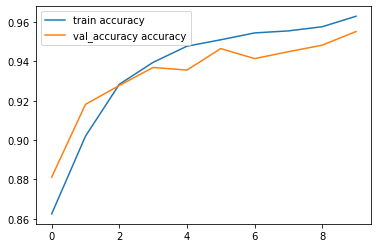

In [35]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy accuracy')
plt.legend()

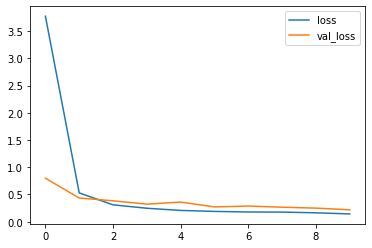

In [36]:
plt.plot(history.history['loss'],label='loss ')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [22]:
x=np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [23]:
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [25]:
np.ndarray.flatten(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [50]:
pred=model.predict(test_images)

In [52]:
pred.shape

(10000, 10)

In [54]:
test_labels.shape

(10000,)

In [55]:
test_labels[0]

7

In [56]:
pred[0]

array([ -9.695083 ,  24.124434 ,  45.482643 ,  52.19819  ,  17.263409 ,
         5.8249483, -78.862686 ,  76.467834 ,   6.9870167,  37.999725 ],
      dtype=float32)

In [57]:
np.argmax(pred[0])

7

In [60]:
pred_argmax=[]
for i in pred:
  pred_argmax.append(np.argmax(i))

In [61]:
pred_argmax[0]

7

In [58]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(test_labels,pred_argmax)

0.9528

In [73]:
np.argmax(model.predict(np.expand_dims(test_images[100],0)))

6

In [64]:
test_images[100].shape

(28, 28)

In [69]:
tf.expand_dims(test_images[100],0).shape

TensorShape([1, 28, 28])

In [71]:
np.expand_dims(test_images[100],0).shape

(1, 28, 28)

In [74]:
test_labels[100]

6

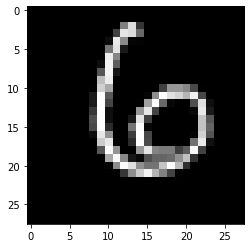

In [76]:
plt.imshow(test_images[100],cmap='gray')